# Interact.jl
* Repository : https://github.com/JuliaGizmos/Interact.jl

## 설치

In [2]:
Pkg.add("Interact")

INFO: Cloning cache of Interact from https://github.com/JuliaGizmos/Interact.jl.git
INFO: Installing Interact v0.4.3
INFO: Building Interact
INFO: Enabling widgetsnbextension
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
INFO: ipywidgets version found: 5.2.2
INFO: A compatible version of ipywidgets was found. All good.
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Interact
INFO: Use `Pkg.update()` to get the latest versions of your packages


search: using SubString takebuf_string include_string unsafe_string

search: using SubString takebuf_string include_string unsafe_string



In [2]:
using Interact
using PyPlot

## 위젯
* Ref : https://github.com/JuliaGizmos/Interact.jl/blob/master/doc/notebooks/

### 슬라이더

In [10]:
float_slider = slider(0:π/4:2π)

Interact.Slider{Float64}(Signal{Float64}(3.141592653589793, nactions=1),"",3.141592653589793,0.0:0.7853981633974483:6.283185307179586,"horizontal",true,".3f",true)

In [11]:
int_slider = slider(1:10)

Interact.Slider{Int64}(Signal{Int64}(5, nactions=1),"",5,1:10,"horizontal",true,"d",true)

In [12]:
signal(int_slider)

5

### 체크박스

In [17]:
display(checkbox(true))

Interact.Checkbox(Signal{Bool}(true, nactions=0),"",true)

In [16]:
checkbox(true)

Interact.Checkbox(Signal{Bool}(true, nactions=0),"",true)

### 토글

In [18]:
status = togglebutton("Mary called", value=true)

Interact.ToggleButton(Signal{Bool}(true, nactions=0),"Mary called",true)

In [22]:
map(s -> s ? "Mary called" : "Mary didn't call", signal(status))

"Mary didn't call"

### 버튼

In [29]:
b = button("Click Me")

Interact.Button{Void}(Signal{Void}(nothing, nactions=0),"Click Me",nothing)

In [30]:
foldp((acc, value) -> acc + 1, 0, signal(b))

0

### 드랍다운

In [31]:
a = dropdown(["one", "two", "three"])

Interact.Options{:Dropdown,String}(Signal{String}(one, nactions=1),"","one","one",Interact.OptionDict(DataStructures.OrderedDict("one"=>"one","two"=>"two","three"=>"three"),Dict("two"=>"two","one"=>"one","three"=>"three")),Any[],Any[],true,"horizontal")

In [33]:
signal(a)


"two"

### 라디오버튼

In [34]:
f = radiobuttons(Dict("Add" => +, "Sub" => -, "Exp" => ^))

Interact.Options{:RadioButtons,Function}(Signal{Function}(-, nactions=1),"",-,"Sub",Interact.OptionDict(DataStructures.OrderedDict{String,Function}("Sub"=>-,"Add"=>+,"Exp"=>^),Dict{Function,String}(Pair{Function,String}(^,"Exp"),Pair{Function,String}(+,"Add"),Pair{Function,String}(-,"Sub"))),Any[],Any[],true,"horizontal")

In [35]:
map(g -> g(e, π*im), signal(f))

2.718281828459045 + 3.141592653589793im

### 토글버튼

In [36]:
f_ = togglebuttons([("Add", +), ("Sub", -), ("Exp", ^)])

Interact.Options{:ToggleButtons,Function}(Signal{Function}(+, nactions=1),"",+,"Add",Interact.OptionDict(DataStructures.OrderedDict{String,Function}("Add"=>+,"Sub"=>-,"Exp"=>^),Dict{Function,String}(Pair{Function,String}(^,"Exp"),Pair{Function,String}(+,"Add"),Pair{Function,String}(-,"Sub"))),Any[],Any[],true,"horizontal")

In [38]:
map(g -> g(e, π*im), signal(f_))

-1.0 + 1.2246467991473532e-16im

### 텍스트박스

In [39]:
string_box = textbox("Change me")

Interact.Textbox{String}(Signal{String}(Change me, nactions=1),"",nothing,"Change me")

In [40]:
signal(string_box)

"안녕하세요!"

In [41]:
int_box = textbox(0)

Interact.Textbox{Int64}(Signal{Int64}(0, nactions=1),"",nothing,0)

In [43]:
signal(int_box)

2002

In [44]:
float_box = textbox(0.0)

Interact.Textbox{Float64}(Signal{Float64}(0.0, nactions=1),"",nothing,0.0)

In [46]:
signal(float_box)

56.28796123

In [51]:
bounded_float_box = textbox(2pi, range=-10.0:10)

Interact.Textbox{Float64}(Signal{Float64}(6.283185307179586, nactions=1),"",-10.0:1.0:10.0,6.283185307179586)

In [52]:
signal(bounded_float_box)

9.88

### 텍스트 에어리어

In [53]:
tex = textarea("Your very own \$\\LaTeX\$ editor")

Interact.Textarea{String}(Signal{String}(Your very own $\LaTeX$ editor, nactions=0),"","Your very own \$\\LaTeX\$ editor")

In [55]:
map(latex, signal(tex))

Interact.Latex("","Your very own \$\\LaTeX\$ editor\n")

### 위젯 펑션

In [68]:
map(display, [
    widget(1:10),                 # Slider
    widget(false),                # Checkbox
    widget("text"),               # Textbox
    widget(1.1),                  # Number Textbox
    widget([:on, :off]),          # Toggle Buttons
    widget(Dict(:π => float(π), :τ => 2π))
    ]);

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(5, nactions=1),"",5,"5",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)),Any[],Any[],true,"horizontal")

Interact.Checkbox(Signal{Bool}(false, nactions=0),"",false)

Interact.Textbox{AbstractString}(Signal{AbstractString}(text, nactions=1),"",nothing,"text")

Interact.Textbox{Float64}(Signal{Float64}(1.1, nactions=1),"",nothing,1.1)

Interact.Options{:ToggleButtons,Symbol}(Signal{Symbol}(on, nactions=1),"",:on,"on",Interact.OptionDict(DataStructures.OrderedDict("on"=>:on,"off"=>:off),Dict(:off=>"off",:on=>"on")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(6.283185307179586, nactions=1),"",6.283185307179586,"τ",Interact.OptionDict(DataStructures.OrderedDict("τ"=>6.28319,"π"=>3.14159),Dict(3.14159=>"π",6.28319=>"τ")),Any[],Any[],true,"horizontal")

## 연습
* Ref : https://github.com/JuliaGizmos/Interact.jl/blob/master/doc/notebooks/03-Interactive%20Diagrams%20and%20Plots.ipynb

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"α",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"β",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"γ",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Textbox{AbstractString}(Signal{AbstractString}(a funny plot, nactions=1),"leg",nothing,"a funny plot")

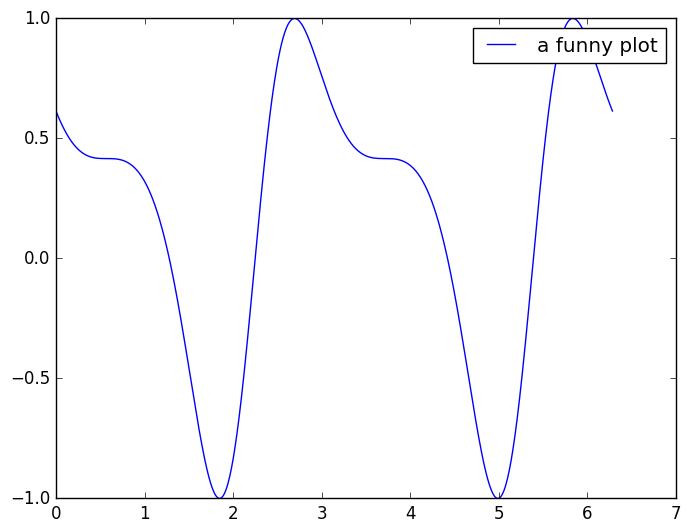

In [3]:
f = figure()
x = linspace(0,2π,1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg="a funny plot"; withfig(f) do
        PyPlot.plot(x, cos(α*x + sin(β*x + γ)))
        legend([leg])
    end
end

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"α",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"β",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(2.0, nactions=1),"γ",2.0,"2.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.1"=>1.1,"1.2"=>1.2,"1.3"=>1.3,"1.4"=>1.4,"1.5"=>1.5,"1.6"=>1.6,"1.7"=>1.7,"1.8"=>1.8,"1.9"=>1.9…),Dict(1.2=>"1.2",2.8=>"2.8",2.0=>"2.0",1.5=>"1.5",2.2=>"2.2",2.1=>"2.1",1.4=>"1.4",2.6=>"2.6",2.3=>"2.3",2.9=>"2.9"…)),Any[],Any[],true,"horizontal")

Interact.Textbox{AbstractString}(Signal{AbstractString}(a funny plot, nactions=1),"leg1",nothing,"a funny plot")

Interact.Textbox{AbstractString}(Signal{AbstractString}( an even funnier plot, nactions=1),"leg2",nothing," an even funnier plot")

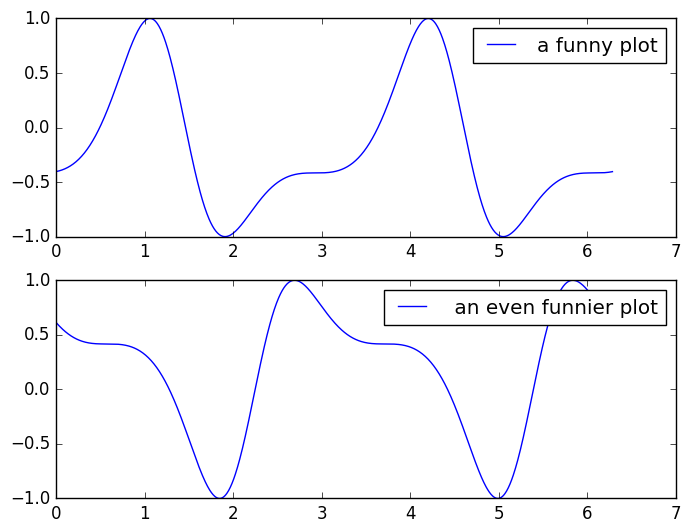

In [4]:
f2,axes = subplots(2,1)
x = linspace(0,2π,1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg1="a funny plot", leg2=" an even funnier plot" 
    withfig(f2,clear=false) do
        for ax in axes
            ax[:cla]()
        end
        axes[1][:plot](x, sin(α*x + cos(β*x + γ)))
        axes[2][:plot](x, cos(α*x + sin(β*x + γ)))
        axes[1][:legend]([leg1])
        axes[2][:legend]([leg2])
    end
end

Interact.Textbox{Float64}(Signal{Float64}(1.5, nactions=1),"저주파",nothing,1.5)

Interact.Textbox{Float64}(Signal{Float64}(1.5, nactions=1),"고주파",nothing,1.5)

Interact.Textbox{Float64}(Signal{Float64}(1.5, nactions=1),"위상",nothing,1.5)

Interact.Textbox{AbstractString}(Signal{AbstractString}(a funny plot, nactions=1),"leg",nothing,"a funny plot")

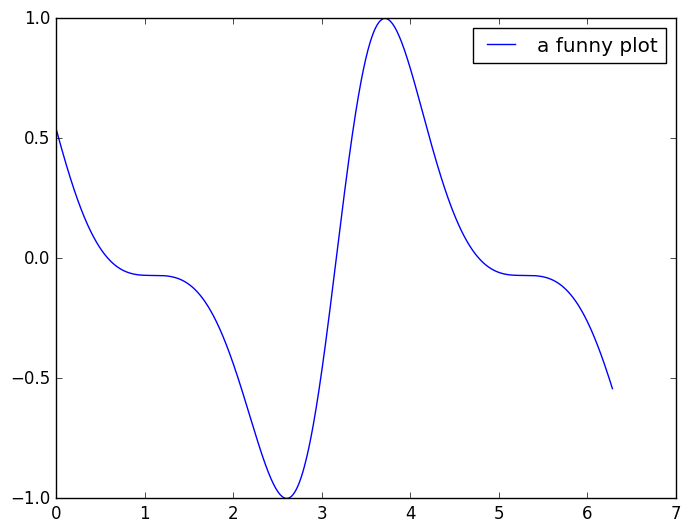

In [15]:
f = figure()
x = linspace(0,2π,1000)
@manipulate for 저주파=1.5, 고주파=1.5, 위상=1.5, leg="a funny plot";
    withfig(f) do
        PyPlot.plot(x, cos(저주파*x + sin(고주파*x + 위상)))
        legend([leg])
    end
end

In [17]:
using Colors

@manipulate for r = 0:.05:1, g = 0:.05:1, b = 0:.05:1
    HTML(string("<div style='color:#", hex(RGB(r,g,b)), "'>Color me</div>"))
end

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.5, nactions=1),"r",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.05"=>0.05,"0.1"=>0.1,"0.15"=>0.15,"0.2"=>0.2,"0.25"=>0.25,"0.3"=>0.3,"0.35"=>0.35,"0.4"=>0.4,"0.45"=>0.45…),Dict(1.0=>"1.0",0.95=>"0.95",0.3=>"0.3",0.45=>"0.45",0.25=>"0.25",0.35=>"0.35",0.7=>"0.7",0.0=>"0.0",0.85=>"0.85",0.15=>"0.15"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.5, nactions=1),"g",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.05"=>0.05,"0.1"=>0.1,"0.15"=>0.15,"0.2"=>0.2,"0.25"=>0.25,"0.3"=>0.3,"0.35"=>0.35,"0.4"=>0.4,"0.45"=>0.45…),Dict(1.0=>"1.0",0.95=>"0.95",0.3=>"0.3",0.45=>"0.45",0.25=>"0.25",0.35=>"0.35",0.7=>"0.7",0.0=>"0.0",0.85=>"0.85",0.15=>"0.15"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(Signal{Float64}(0.5, nactions=1),"b",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.05"=>0.05,"0.1"=>0.1,"0.15"=>0.15,"0.2"=>0.2,"0.25"=>0.25,"0.3"=>0.3,"0.35"=>0.35,"0.4"=>0.4,"0.45"=>0.45…),Dict(1.0=>"1.0",0.95=>"0.95",0.3=>"0.3",0.45=>"0.45",0.25=>"0.25",0.35=>"0.35",0.7=>"0.7",0.0=>"0.0",0.85=>"0.85",0.15=>"0.15"…)),Any[],Any[],true,"horizontal")

HTML{String}("<div style='color:#808080'>Color me</div>")

In [19]:
r = slider(0:0.01:1, label="R")
g = slider(0:0.01:1, label="G")
b = slider(0:0.01:1, label="B")
map(display, [r,g,b])

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=1),"R",0.5,0.0:0.01:1.0,"horizontal",true,".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=1),"G",0.5,0.0:0.01:1.0,"horizontal",true,".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=1),"B",0.5,0.0:0.01:1.0,"horizontal",true,".3f",true)

3-element Array{Void,1}:
 nothing
 nothing
 nothing

In [24]:
s = slider(0:.1:1,label="Slider X:")

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=1),"Slider X:",0.5,0.0:0.1:1.0,"horizontal",true,".3f",true)

In [26]:
xsquared = map(x -> x*x, signal(s))

0.010000000000000002

In [27]:
typeof(xsquared)

Reactive.Signal{Float64}